In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/diabetes_prediction_dataset.csv')
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [ ]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [ ]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [ ]:
df.duplicated().sum()

3854

In [ ]:
X=df.drop('diabetes',axis=1)
y=df['diabetes']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0])],remainder='passthrough')
x=np.array(ct.fit_transform(X))

In [ ]:
cat_df=df.select_dtypes(include='object')
num_df=df.select_dtypes(exclude='object')


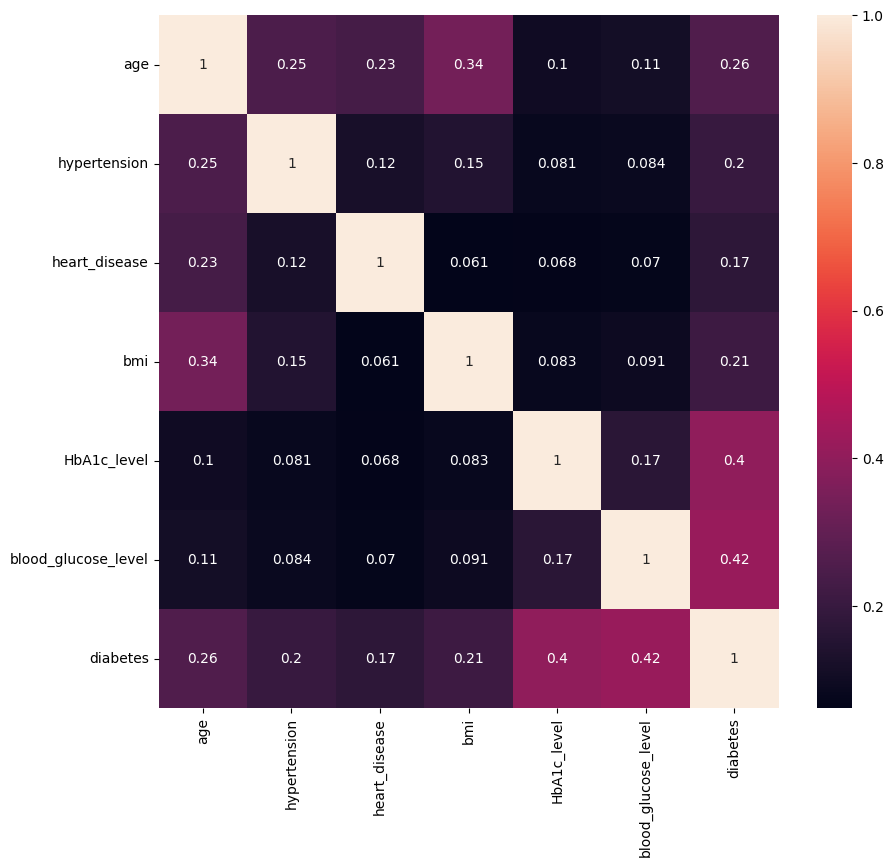

In [ ]:
plt.figure(figsize=(10,9))
sns.heatmap(num_df.corr(),annot=True)
plt.show()

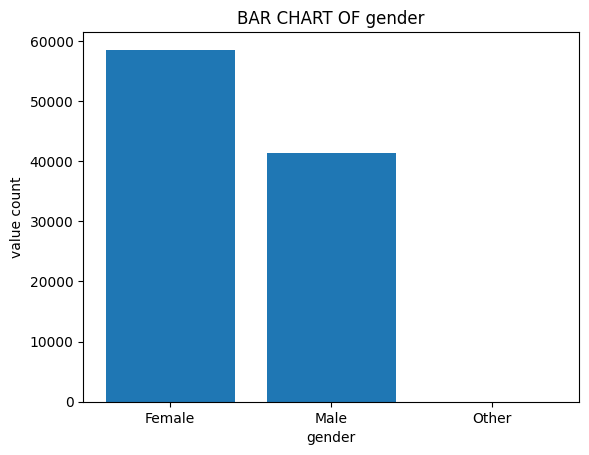

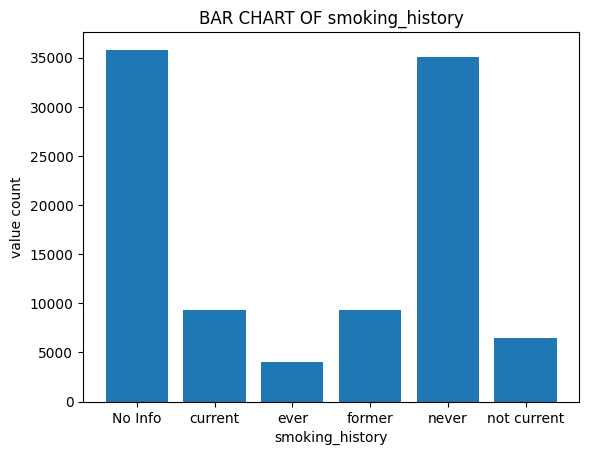

In [ ]:
for f in cat_df.columns.to_list():
    unique,counts=np.unique(cat_df[f],return_counts=True)
    plt.bar(unique,counts)
    plt.xlabel(f)
    plt.ylabel('value count')
    plt.title(f"BAR CHART OF {f}")
    plt.show()

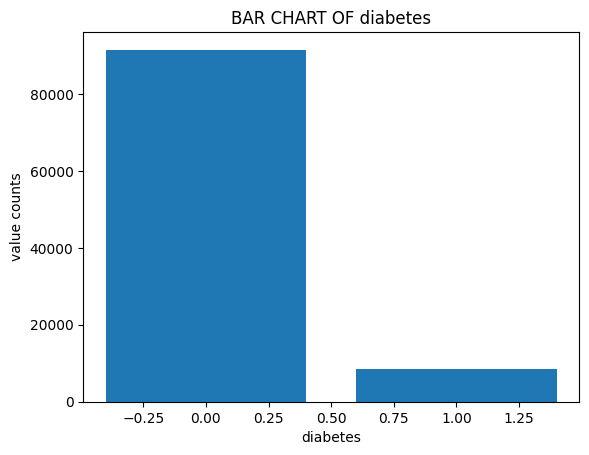

In [ ]:
    unique,counts=np.unique(num_df['diabetes'],return_counts=True)
    plt.bar(unique,counts)
    plt.xlabel('diabetes')
    plt.ylabel('value counts')
    plt.title("BAR CHART OF diabetes")
    plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
cat_features=cat_df.columns.to_list()
encoder=LabelEncoder()
for f in cat_features:
    df[f]=encoder.fit_transform(df[f])

In [ ]:
df['gender'] = pd.to_numeric(df['gender'],errors='coerce')

In [ ]:
df.dtypes

gender                   int64
age                    float64
hypertension             int64
heart_disease            int64
smoking_history          int64
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
num_features=num_df.columns.to_list()[:-1]
scaler=MinMaxScaler()
df[num_features]=scaler.fit_transform(df[num_features])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:473: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:474: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


In [ ]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0


In [ ]:
from sklearn.model_selection import train_test_split
features_list=df.columns.to_list()
features_data,target_data=df[features_list[:-1]],df[features_list[-1]]
print("features:",features_data.columns)
print("target:",target_data.name)

x_train,x_test,y_train,y_test=train_test_split(features_data,target_data,stratify=target_data,test_size=0.25)

features: Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level'],
      dtype='object')
target: diabetes


In [ ]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression(solver='liblinear', random_state=0)
logreg.fit(x_train,y_train)

LogisticRegression(random_state=0, solver='liblinear')

NameError: name 'num_data' is not defined

<Figure size 1000x900 with 0 Axes>

In [ ]:
#Model Building
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='entropy', random_state=1) #criteria is entropy
model2 = model.fit(x_train, y_train)
model2

DecisionTreeClassifier(criterion='entropy', random_state=1)

In [ ]:
y_pred = model2.predict(x_test)
y_pred

array([1, 0, 0, ..., 0, 0, 0])

In [ ]:
#we use metrics to get confusion matrix and accuracy score
from sklearn.metrics import confusion_matrix, accuracy_score
cm=confusion_matrix(y_test,y_pred)
cm

array([[22277,   598],
       [  556,  1569]])

In [ ]:
accuracy_score(y_test,y_pred)

0.95384

[Text(0.36648211211882276, 0.9875, 'x[6] <= 6.7\nentropy = 0.42\nsamples = 75000\nvalue = [68625, 6375]'), Text(0.3659998939150856, 0.9625, 'x[7] <= 210.0\nentropy = 0.279\nsamples = 72104\nvalue = [68625, 3479]'), Text(0.36551767571134836, 0.9375, 'x[6] <= 5.35\nentropy = 0.193\nsamples = 70731\nvalue = [68625, 2106]'), Text(0.3650354575076112, 0.9125, 'entropy = 0.0\nsamples = 28331\nvalue = [28331, 0]'), Text(0.3659998939150856, 0.9125, 'x[1] <= 43.5\nentropy = 0.285\nsamples = 42400\nvalue = [40294, 2106]'), Text(0.08743227636188969, 0.8875, 'x[5] <= 30.425\nentropy = 0.095\nsamples = 22225\nvalue = [21955, 270]'), Text(0.042461749830470165, 0.8625, 'x[7] <= 113.0\nentropy = 0.059\nsamples = 18711\nvalue = [18584, 127]'), Text(0.04197953162673297, 0.8375, 'entropy = 0.0\nsamples = 5755\nvalue = [5755, 0]'), Text(0.04294396803420735, 0.8375, 'x[1] <= 13.5\nentropy = 0.079\nsamples = 12956\nvalue = [12829, 127]'), Text(0.005063291139240506, 0.8125, 'x[1] <= 3.5\nentropy = 0.021\nsamp

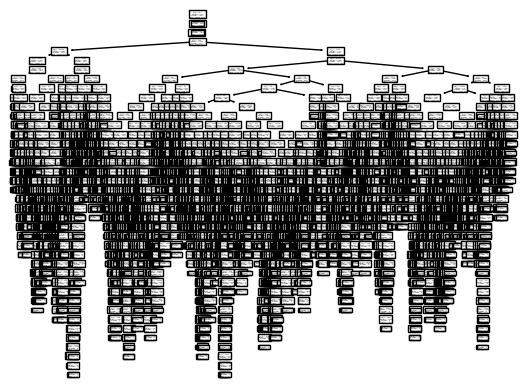

In [ ]:
from sklearn import tree
print(tree.plot_tree(model2))

[Text(0.6, 0.8333333333333334, 'x[6] <= 6.7\nentropy = 0.42\nsamples = 75000\nvalue = [68625, 6375]'),
 Text(0.4, 0.5, 'x[7] <= 210.0\nentropy = 0.279\nsamples = 72104\nvalue = [68625, 3479]'),
 Text(0.2, 0.16666666666666666, 'entropy = 0.193\nsamples = 70731\nvalue = [68625, 2106]'),
 Text(0.6, 0.16666666666666666, 'entropy = 0.0\nsamples = 1373\nvalue = [0, 1373]'),
 Text(0.8, 0.5, 'entropy = 0.0\nsamples = 2896\nvalue = [0, 2896]')]

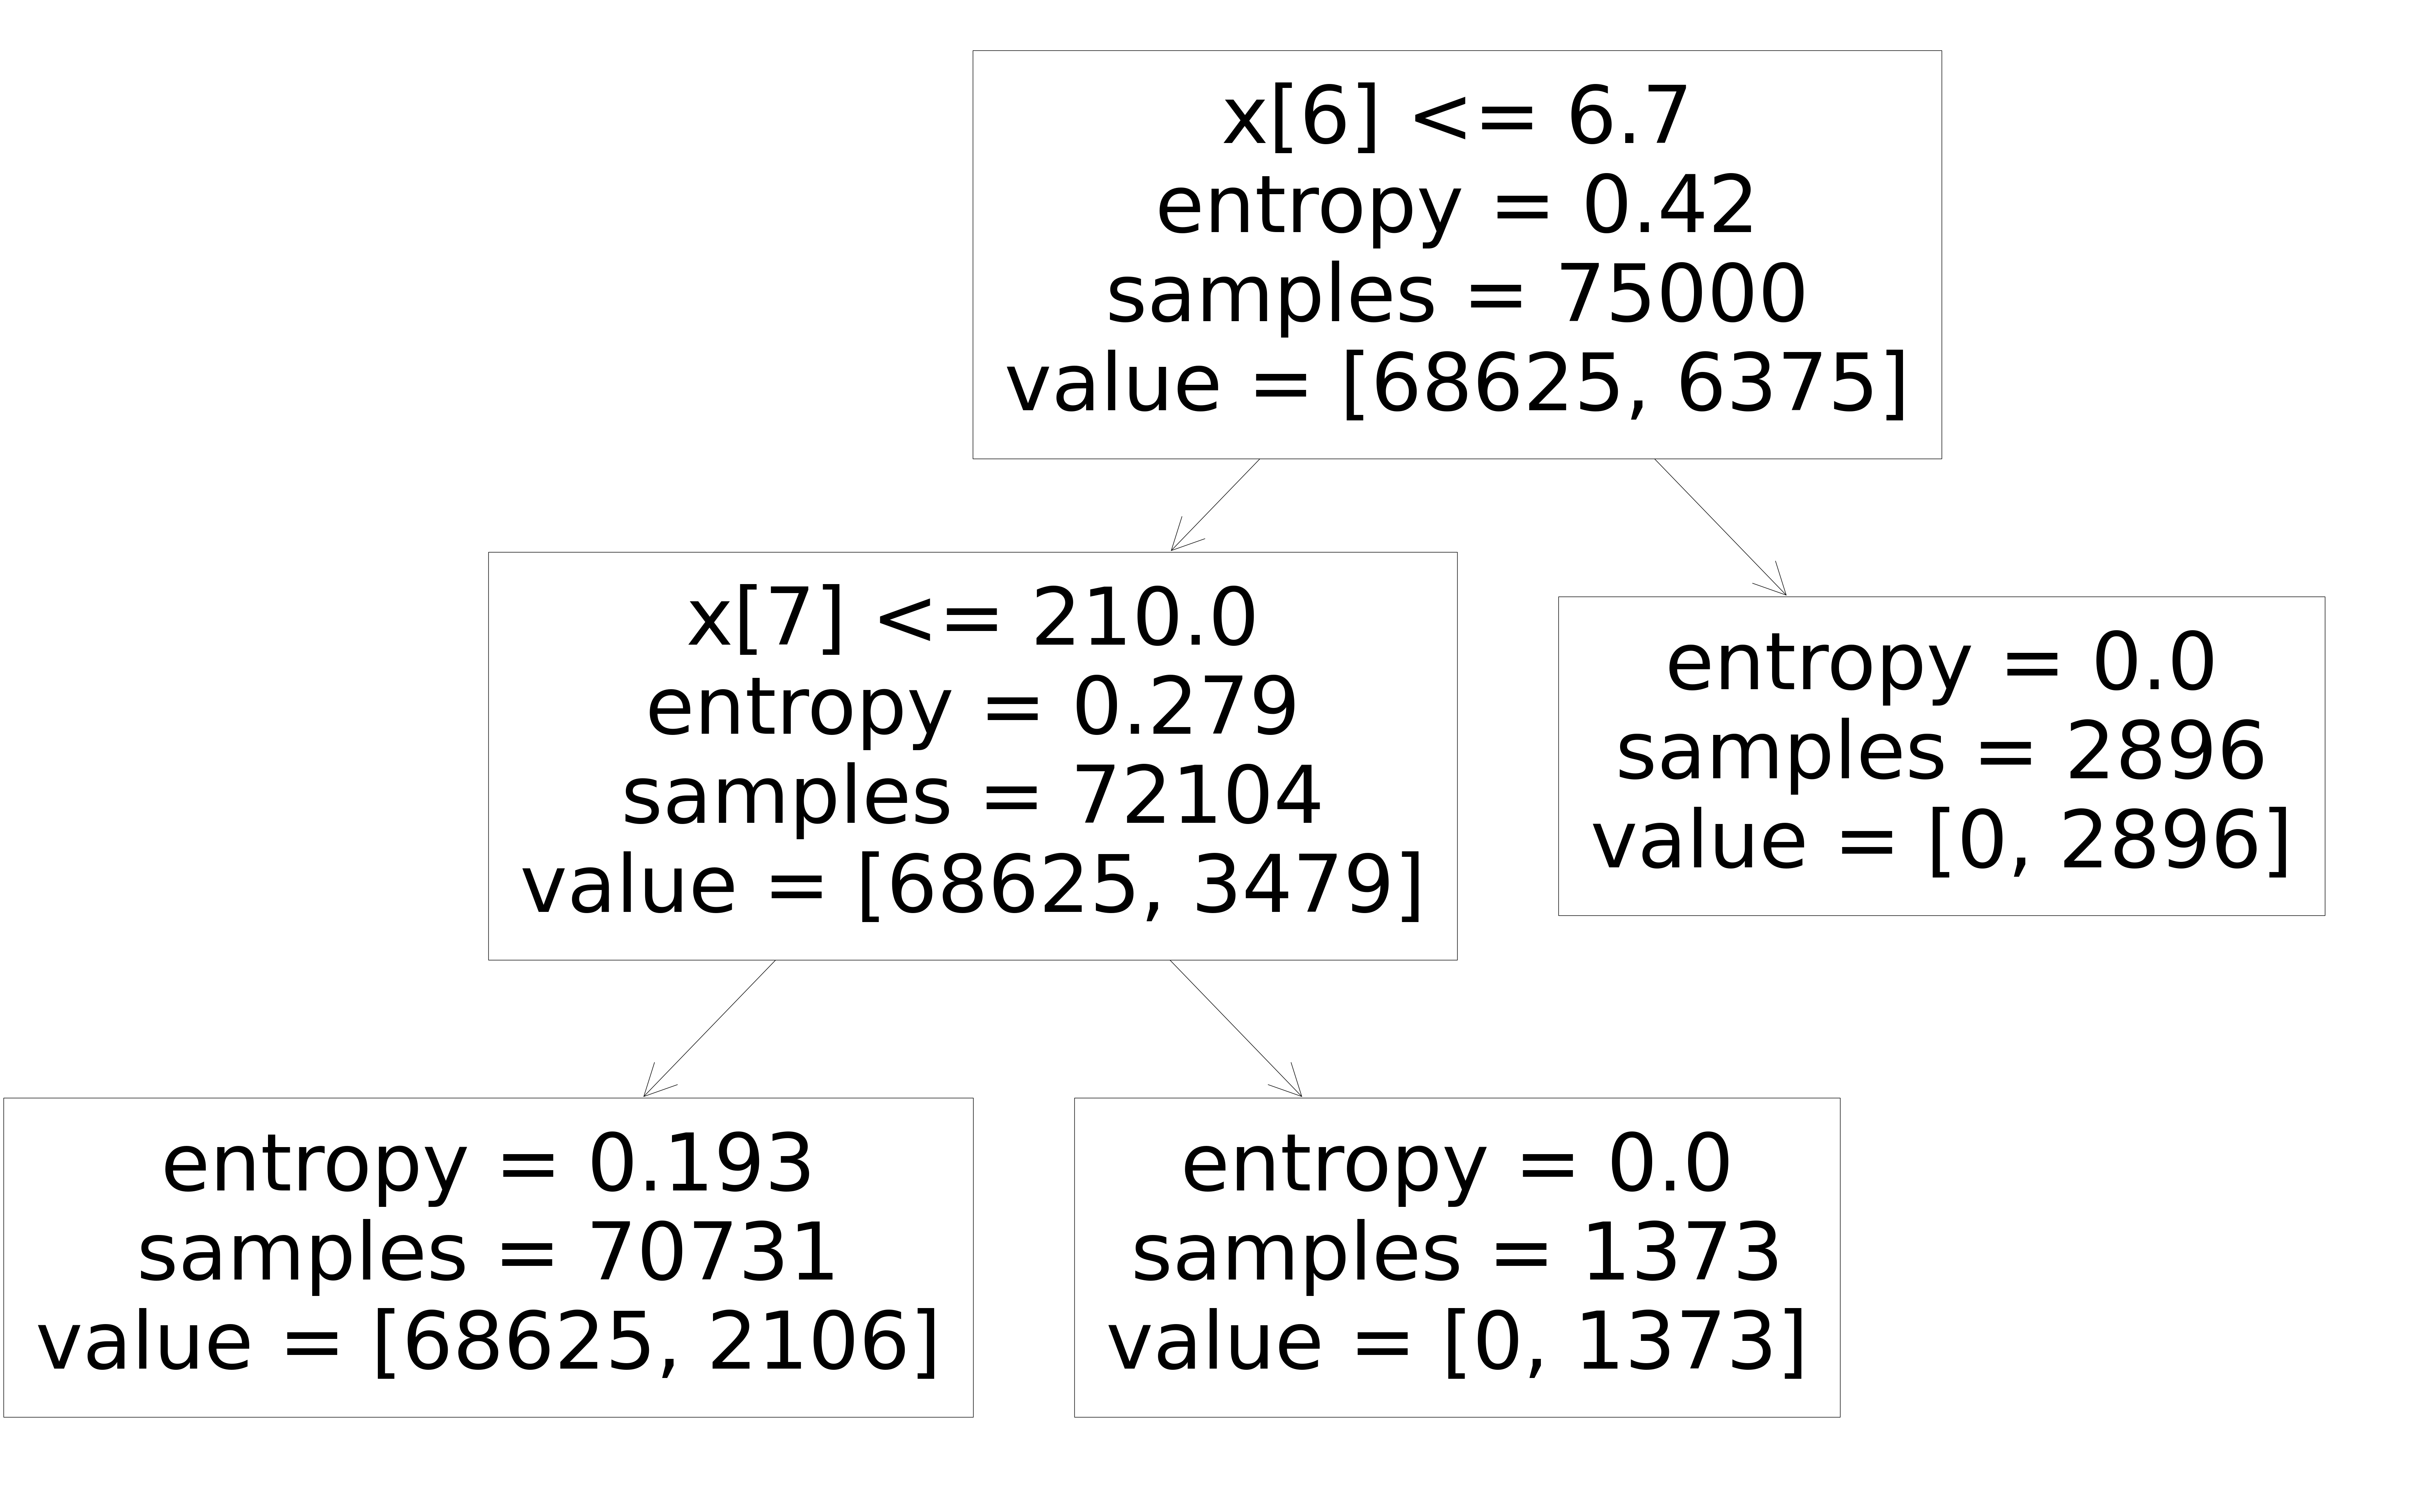

In [ ]:
#The above plot is too small, so to get larger picture
from sklearn.tree import plot_tree
from matplotlib.pyplot import rcParams
rcParams['figure.figsize']=80,50
plot_tree(clf)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
clf=DecisionTreeClassifier(max_depth=2,random_state=42,criterion='entropy')
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)

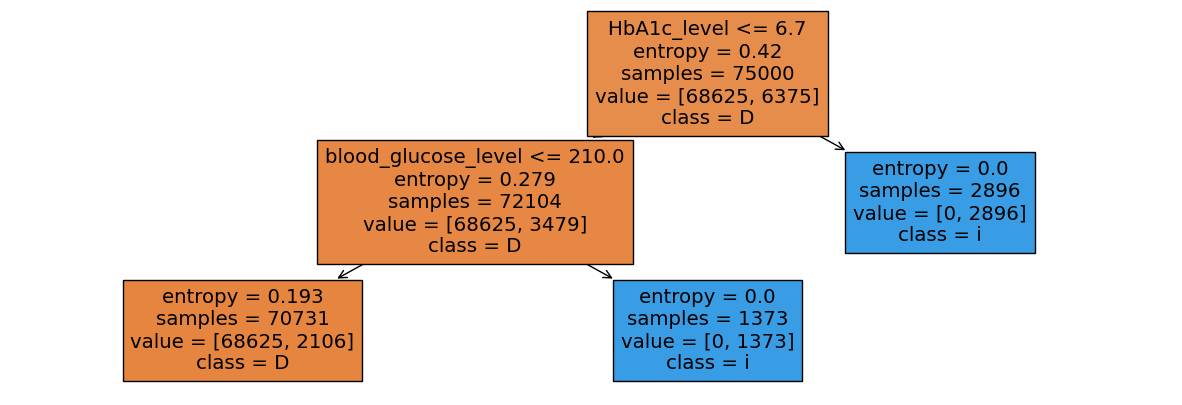

In [ ]:
plt.figure(figsize=(15,5))
tree.plot_tree(clf,feature_names=features_list,class_names='Diabetes',filled=True,max_depth=2)
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)

In [ ]:
accuracy=accuracy_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
conf_mat=confusion_matrix(y_test,y_pred)

In [ ]:
conf_mat

array([[68327,   298],
       [ 2046,  4329]])

<Axes: >

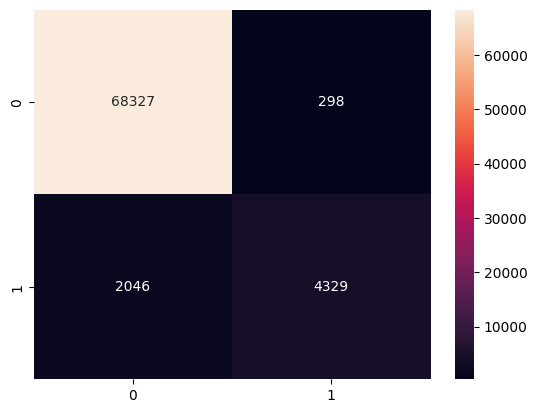

In [ ]:
sns.heatmap(conf_mat,annot=True, fmt='d')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     68625
           1       0.94      0.68      0.79      6375

    accuracy                           0.97     75000
   macro avg       0.95      0.84      0.89     75000
weighted avg       0.97      0.97      0.97     75000

